# ipfjes monthly monitoring part 2

In [1]:
import pandas as pd
import psycopg2 as pg
import pandas.io.sql as psql
import datetime as dt
%matplotlib inline

In [2]:
conn = pg.connect("dbname='carlplaying' user='drcjar' password='drcjar_is_not_fake'")

In [3]:
df = psql.read_sql("SELECT * FROM ipfjes_demographics", conn)

In [4]:
print(len(df))

1005


In [5]:
df1 = psql.read_sql("SELECT * FROM ipfjes_studyparticipantdetails", conn)

In [6]:
print(len(df1))

1005


In [7]:
df1[df1.participant_type.isnull()] # participants with no participant type

,id,created,updated,consistency_token,participant_type,site_ft,created_by_id,episode_id,site_fk_id,updated_by_id,comments,email_address,postal_address,want_updates


In [8]:
df2 = psql.read_sql("SELECT * FROM ipfjes_removalreason", conn)

In [9]:
print(len(df2))

1005


In [10]:
df1.participant_type.value_counts()

case       519
control    486
Name: participant_type, dtype: int64

In [11]:
df3 = df2[df2.reason_fk_id.notnull()]

In [12]:
len(df3)

60

In [13]:
df3

,id,created,updated,consistency_token,reason_ft,created_by_id,episode_id,reason_fk_id,updated_by_id
89,67,None,2017-10-12 16:28:53.408685+01:00,7be270bf,,None,59,3.0,4.0
90,14,None,2017-10-12 16:36:50.673188+01:00,28629739,,None,83,1.0,4.0
93,96,None,2017-10-19 10:34:33.416127+01:00,e8750282,,None,101,1.0,4.0
149,156,None,2017-11-24 10:25:04.486385+00:00,167e947b,,None,161,1.0,4.0
152,95,None,None,8f6267d9,Unknown,None,43,4.0,NaN
231,211,None,2018-01-23 18:24:33.224619+00:00,312d8e08,,None,216,1.0,4.0
252,7,None,None,carl,,None,11,2.0,NaN
253,33,None,None,10bd23bf,,None,28,1.0,NaN
265,237,None,2018-02-08 14:12:50.905425+00:00,9dccc4db,,None,242,3.0,4.0
266,242,None,2018-02-08 14:14:24.350733+00:00,d522e5d6,,None,247,3.0,4.0


In [14]:
pd.merge(df1, df3, on='id').participant_type.value_counts() # number of pts exlcuded at interview
# nb this isn't correct since we're apparently losing not episodes that lack a participant type ?n=2

case       31
control    28
Name: participant_type, dtype: int64

In [15]:
pd.merge(df1, df3, on='id')

,id,created_x,updated_x,consistency_token_x,participant_type,site_ft,created_by_id_x,episode_id_x,site_fk_id,updated_by_id_x,...,postal_address,want_updates,created_y,updated_y,consistency_token_y,reason_ft,created_by_id_y,episode_id_y,reason_fk_id,updated_by_id_y
0,14,None,2017-07-14 15:38:38.391768+01:00,c2505c20,control,,None,14,1.0,3,...,,No,None,2017-10-12 16:36:50.673188+01:00,28629739,,None,83,1.0,4.0
1,7,None,2017-07-21 12:33:08.452850+01:00,7bebe383,case,,None,7,2.0,3,...,by post,Yes,None,None,carl,,None,11,2.0,NaN
2,95,None,2017-10-11 12:56:02.159228+01:00,07c55932,case,,None,95,12.0,3,...,,Yes,None,None,8f6267d9,Unknown,None,43,4.0,NaN
3,33,None,2017-08-16 11:03:00.042267+01:00,2a24f782,case,,None,33,3.0,3,...,,Yes,None,None,10bd23bf,,None,28,1.0,NaN
4,67,None,2017-09-08 11:13:51.480237+01:00,234c45d7,case,,None,67,12.0,3,...,"43 Rodger Street, Treboth, Swansea. SA5 9AS",Yes,None,2017-10-12 16:28:53.408685+01:00,7be270bf,,None,59,3.0,4.0
5,96,None,2017-10-12 13:56:11.326558+01:00,6652cda6,case,,None,96,12.0,3,...,,Yes,None,2017-10-19 10:34:33.416127+01:00,e8750282,,None,101,1.0,4.0
6,156,None,2017-11-23 15:19:31.534953+00:00,ab19dfc6,case,,None,156,2.0,3,...,"19 Tomlinson Street, Liverpool L5 5EH",Yes,None,2017-11-24 10:25:04.486385+00:00,167e947b,,None,161,1.0,4.0
7,211,None,2017-12-22 13:16:54.830740+00:00,cd561ab5,case,,None,211,9.0,3,...,"Silverdale, Banks Fee Lane, \nLongborough, Mor...",Yes,None,2018-01-23 18:24:33.224619+00:00,312d8e08,,None,216,1.0,4.0
8,242,None,2018-01-22 15:13:14.164227+00:00,901aadb6,case,,None,242,1.0,3,...,,None,None,2018-02-08 14:14:24.350733+00:00,d522e5d6,,None,247,3.0,4.0
9,237,None,2018-01-24 16:05:27.697276+00:00,cf79e85d,case,,None,237,5.0,3,...,"56 Bishops Road, Leasingham, Sleaford, Linc. N...",Yes,None,2018-02-08 14:12:50.905425+00:00,9dccc4db,,None,242,3.0,4.0


In [16]:
df = pd.merge(df, df1, on='id')

In [17]:
df = df[~df.episode_id.isin(df3.episode_id)] # throw away excluded patients

In [18]:
df['centre'] = df.hospital_number.str[:2]

In [19]:
df.groupby('centre').participant_type.value_counts().unstack().sum().sum()

944

In [20]:
df = df[~df.date_of_birth.isnull()] # throw away rows missing date of birth

In [21]:
df['years'] = ((dt.datetime.now() - pd.to_datetime(df.date_of_birth)).dt.days / 365).astype(int)

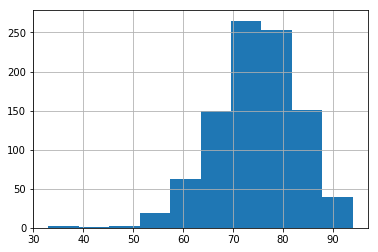

In [22]:
df['years'].hist()

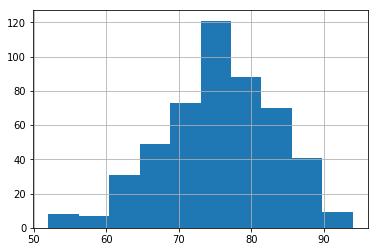

In [23]:
df[df.participant_type == 'case'].years.hist()

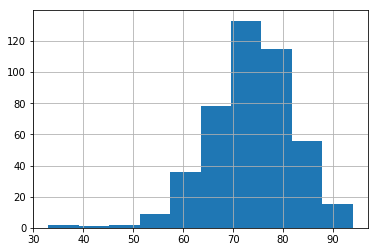

In [24]:
df[df.participant_type == 'control'].years.hist()

In [25]:
df['agegroup']= pd.cut(df.years, range(25,100,5), 
                labels=[
                    '25 to 29',
                    '30 to 34',
                    '35 to 39',
                    '40 to 44',
                    '45 to 49',
                    '50 to 54',
                    '55 to 59',
                    '60 to 64',
                    '65 to 69',
                    '70 to 74',
                    '75 to 79',
                    '80 to 84',
                    '85 to 90',
                    '90 to 94'],
                right=False) # add age 

In [26]:
centre_id = pd.read_csv('ipfjes-centre-ids.csv', index_col='Centre ID')
centre_lookup = centre_id['Organisation'].to_dict()

In [27]:
def centre_stats(centre):
    start_date = dt.date(2017, 6, 1)
    end_date = dt.date(2019, 8, 1)
    elapsed = (dt.date.today() - start_date).days
    remaining = (end_date - dt.date.today()).days

    print('{} ({})'.format(centre_lookup.get(int(centre)), centre))
    print('-----------------')
    
    recruited = df[df.centre == centre].id.count()
    cases = df[(df.centre == centre) & (df.participant_type == 'case')].id.count()
    controls = df[(df.centre == centre) & (df.participant_type == 'control')].id.count()
    print('{} enrolled in {} days ({} cases, {} controls) - {:.2f}/week \n{} in {}\
 days to go - {:.2f}/week '.format(recruited, elapsed, cases, controls, (recruited/elapsed*7),
                                (80 - recruited), remaining, (80 - recruited)/remaining*7))
    
    print('\n')
    print(df[df.centre == centre].groupby('participant_type').agegroup.value_counts(sort=False).unstack())
    print('\n')

In [28]:
# big dirty hack to make upper cat be 85+

df.agegroup.cat.categories = ['25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54',
       '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84',
       '85+', '90 to 94']

df.loc[df.agegroup > "80 to 84", "agegroup"] = "85+"

In [29]:
centres = df.centre.unique()
centres.sort()
for centre in centres:
    try:
        centre_stats(centre) # because we have a pt with no case or control status
    except IndexError:
        continue
        

Heart of England NHS Foundation Trust (01)
-----------------
81 enrolled in 820 days (43 cases, 38 controls) - 0.69/week 
-1 in -29 days to go - 0.24/week 


agegroup          50 to 54  55 to 59  60 to 64  65 to 69  70 to 74  75 to 79  \
participant_type                                                               
case                     1         1         1         5        14         8   
control                  1         1         2         5        11         9   

agegroup          80 to 84  85+  
participant_type                 
case                    11    2  
control                  6    3  


Morriston Hospital (02)
-----------------
24 enrolled in 820 days (13 cases, 11 controls) - 0.20/week 
56 in -29 days to go - -13.52/week 


agegroup          55 to 59  60 to 64  65 to 69  70 to 74  75 to 79  80 to 84
participant_type                                                            
case                   1.0       1.0       3.0       NaN       5.0       3.0
control    

agegroup          60 to 64  65 to 69  70 to 74  75 to 79  85+
participant_type                                             
case                   NaN       1.0       1.0       2.0  3.0
control                2.0       NaN       3.0       1.0  1.0


Guys’ and St Thomas’ NHS Foundation Trust (20)
-----------------
55 enrolled in 820 days (31 cases, 24 controls) - 0.47/week 
25 in -29 days to go - -6.03/week 


agegroup          60 to 64  65 to 69  70 to 74  75 to 79  80 to 84  85+
participant_type                                                       
case                     3         5         5        10         4    4
control                  3         4         9         6         1    1


Norfolk and Norwich University Hospitals NHS Foundation Trust (21)
-----------------
9 enrolled in 820 days (7 cases, 2 controls) - 0.08/week 
71 in -29 days to go - -17.14/week 


agegroup          55 to 59  60 to 64  70 to 74  80 to 84  85+
participant_type                                      

In [30]:
df['tenyear-agegroup'] = pd.cut(df.years,
     ...:                    bins=[0, 25, 34, 44, 54, 64, 74, 999],
     ...:                    labels=['Under 25', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'],
     ...:                    include_lowest=True) # do 10 year binning

In [31]:
for centre in ['05', '06', '07', '21', '10', '14', '15', '11']:
    try:
        print('{} ({})'.format(centre_lookup.get(int(centre)), centre))
        print('-----------------')
        print('\n')
        print(df[df.centre == centre].groupby('participant_type')['tenyear-agegroup'].value_counts(sort=False).unstack())
        print('\n')   
    except IndexError:
        continue


University Hospital of South Manchester (05)
-----------------


tenyear-agegroup  55-64  65-74  75+
participant_type                   
case                  4     17   19
control               5     14   13


Papworth Hospital NHS Foundation Trust (06)
-----------------


tenyear-agegroup  35-44  55-64  65-74   75+
participant_type                           
case                NaN    3.0   14.0  18.0
control             1.0    5.0   15.0  15.0


Royal Devon and Exeter NHS Foundation Trust (07)
-----------------


tenyear-agegroup  35-44  45-54  55-64  65-74  75+
participant_type                                 
case                NaN    NaN    3.0    4.0  8.0
control             1.0    1.0    2.0    4.0  7.0


Norfolk and Norwich University Hospitals NHS Foundation Trust (21)
-----------------


tenyear-agegroup  55-64  65-74  75+
participant_type                   
case                2.0    2.0  3.0
control             2.0    NaN  NaN


Imperial College Healthcare NHS Trust (10)


In [32]:
cake = psql.read_sql("SELECT * FROM ipfjes_demographics", conn)

In [33]:
cake = cake[cake.hospital_number.str[:2] == '01']

##### set(cake.patient_id) - set(jam.episode_id)

In [34]:
df.head()

,id,created_x,updated_x,consistency_token_x,hospital_number,nhs_number,surname,first_name,middle_name,date_of_birth,...,site_fk_id,updated_by_id_y,comments,email_address,postal_address,want_updates,centre,years,agegroup,tenyear-agegroup
0,95,None,2017-10-10 13:21:47.570745+01:00,6ff1370e,020007,None,Falvey,Brian,None,1936-10-17,...,12.0,3,,brain.falvey@btinternet.com,,Yes,02,82,80 to 84,75+
1,30,None,2018-07-05 14:05:28.384524+01:00,4048aec2,080016,None,Gilbertson,Peter,None,1939-12-05,...,2.0,3,,petergilbertson@manx.net,,Yes,08,79,75 to 79,75+
2,429,None,2018-05-14 11:29:00.482781+01:00,4bebff27,090041,None,Sevier,David,None,1941-12-24,...,9.0,3,,None,"89 Neville Road, Kingswood. Bristol. BS15 1XX",Yes,09,77,75 to 79,75+
3,37,None,2017-08-09 12:04:15.256730+01:00,091c2bdc,010002,None,Davis,Tony,None,1942-11-24,...,4.0,3,,judytonyd@msn.com,,Yes,01,76,75 to 79,75+
4,523,None,2018-07-12 08:49:38.331069+01:00,c78b85d8,060003,None,Chapman,Kenneth,None,1943-08-12,...,7.0,1,,None,"208 Southfields Ave, Peterborough, PE2 8RY",Yes,06,76,75 to 79,75+


In [35]:
df[df.centre == centre].groupby('participant_type').agegroup.value_counts(sort=False)

participant_type  agegroup
case              50 to 54    2
                  60 to 64    2
                  65 to 69    3
                  70 to 74    2
                  75 to 79    2
                  85+         1
control           55 to 59    2
                  65 to 69    2
                  70 to 74    2
                  75 to 79    1
                  80 to 84    1
                  85+         1
Name: agegroup, dtype: int64

In [36]:
print(df.groupby('participant_type').agegroup.value_counts(sort=False).unstack())

agegroup          30 to 34  35 to 39  40 to 44  50 to 54  55 to 59  60 to 64  \
participant_type                                                               
case                   NaN       NaN       NaN       4.0      10.0      32.0   
control                1.0       1.0       1.0       5.0      13.0      41.0   

agegroup          65 to 69  70 to 74  75 to 79  80 to 84   85+  
participant_type                                                
case                  61.0     104.0     130.0      92.0  64.0  
control               66.0     113.0     102.0      64.0  40.0  


In [37]:
df.columns

Index(['id', 'created_x', 'updated_x', 'consistency_token_x',
       'hospital_number', 'nhs_number', 'surname', 'first_name', 'middle_name',
       'date_of_birth', 'religion', 'date_of_death', 'post_code',
       'gp_practice_code', 'death_indicator', 'title_ft', 'marital_status_ft',
       'sex_ft', 'birth_place_ft', 'ethnicity_ft', 'birth_place_fk_id',
       'created_by_id_x', 'ethnicity_fk_id', 'marital_status_fk_id',
       'patient_id', 'sex_fk_id', 'title_fk_id', 'updated_by_id_x',
       'contact_details', 'phone_number', 'created_y', 'updated_y',
       'consistency_token_y', 'participant_type', 'site_ft', 'created_by_id_y',
       'episode_id', 'site_fk_id', 'updated_by_id_y', 'comments',
       'email_address', 'postal_address', 'want_updates', 'centre', 'years',
       'agegroup', 'tenyear-agegroup'],
      dtype='object')

In [38]:
df[(df.centre == '10') & (df.agegroup == '75 to 79')][['participant_type', 'hospital_number']]

,participant_type,hospital_number
198,case,100017
221,case,100016
252,case,100019
336,case,100023
436,case,100003
775,control,100098
835,control,100034
849,control,100040
856,control,100041
858,control,100043
